In [84]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Noto Sans KR')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [85]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [86]:
df.loc['3번','학교'] = '산북고'
df.loc['7번','학교'] = '남능고'

In [87]:
group = df.groupby('학교')['키'].mean()
group

학교
남능고    188.0
능남고    196.0
북산고    189.0
산북고    168.0
Name: 키, dtype: float64

In [88]:
school = group.index
height = group.values
school, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([188., 196., 189., 168.]))

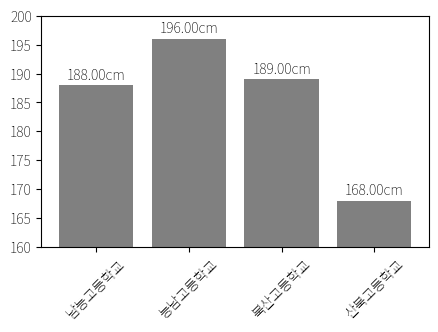

In [89]:
plt.figure(figsize=(5,3))
plt.bar(school, height, color='gray')
plt.ylim(160,200)
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h:.2f}cm', ha='center')
plt.xticks(school, [s+'등학교' for s in school], rotation=45)
plt.show()

In [90]:
#학교별 학생수 막대그래프로 출력
group = df.groupby('학교').size()
group

학교
남능고    1
능남고    2
북산고    4
산북고    1
dtype: int64

In [91]:
school = group.index
students = group.values
school, students

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([1, 2, 4, 1]))

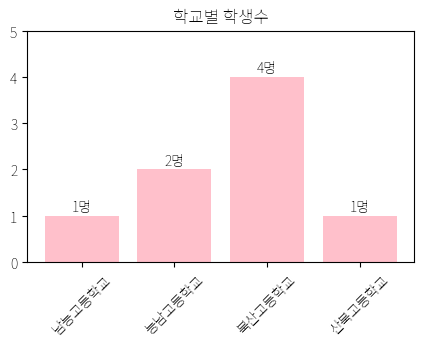

In [92]:
plt.figure(figsize=(5,3))
plt.title('학교별 학생수')
plt.bar(school, students, color='pink')
plt.ylim(0,5)
for idx, s in enumerate(students):
    plt.text(idx, s+0.1, f'{s}명', ha='center')
plt.xticks(school, [s+'등학교' for s in school], rotation=45)
plt.show()

In [93]:
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,산북고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,없음
5번,강백호,북산고,188,15,20,10,35,10,없음
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#


In [96]:
group = df.groupby('SW특기').size() #size, count null값 들어가는지 체크*

In [105]:
sw = group.index
count = group.values
sw, count

(Index(['C', 'C#', 'Java', 'Javascript', 'Python', '없음'], dtype='object', name='SW특기'),
 array([1, 1, 1, 1, 2, 2]))

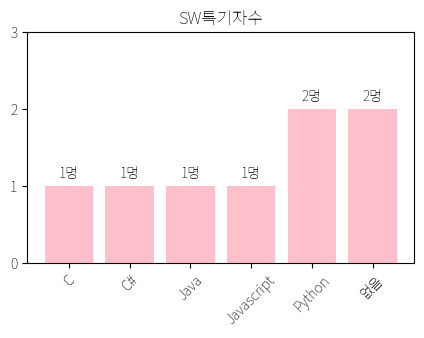

In [109]:
plt.figure(figsize=(5,3))
plt.title('SW특기자수')
plt.bar(sw, count, color='pink')
plt.ylim(0,max(count)+1)
plt.yticks([y for y in range(0,max(count)+2,1)])
for idx, c in enumerate(count):
    plt.text(idx, c+0.1, f'{c}명', ha='center')
plt.xticks(sw, rotation=45)
plt.show()

In [130]:
#학교별 평균점수
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
avg=df['평균']
group = df.groupby('학교')['평균'].mean()
group
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
3번,송태섭,산북고,168,80,75,70,80,75,Javascript,76.0
4번,서태웅,북산고,187,40,60,70,75,80,없음,65.0
5번,강백호,북산고,188,15,20,10,35,10,없음,18.0
6번,변덕규,능남고,202,80,100,95,85,80,C,88.0
7번,황태산,남능고,188,55,65,45,40,35,Python,48.0
8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


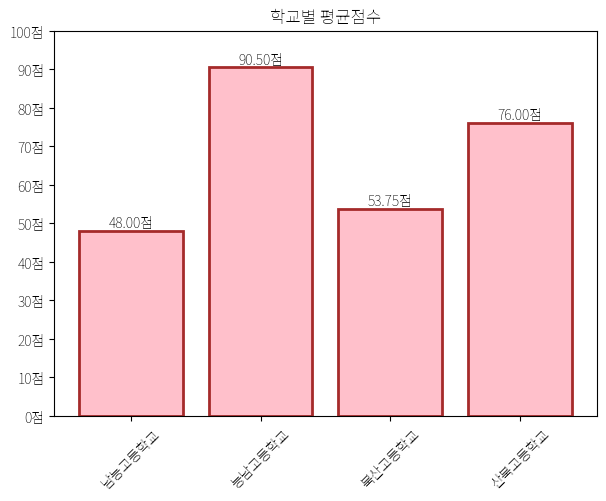

In [141]:
school = group.index
avg = group.values
plt.figure(figsize=(7,5))
plt.title('학교별 평균점수')
plt.bar(school,avg, color='pink', ec='brown', lw=2)
plt.ylim(0,100)
yticks = [y for y in range(0,101,10)]
plt.yticks(yticks, [f'{y}점' for y in yticks] )
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}점', ha='center')
plt.xticks(school,[s+'등학교' for s in school], rotation=45)
plt.show()